matplotlib version 3.2.2

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from matplotlib.ticker import NullFormatter
import glob
import time
import math
#plt.rcParams["figure.figsize"] = (3,3)

#from scipy.optimize import curve_fit

In [2]:
def mean2(x):
    y = np.sum(x) / np.size(x);
    return y

def corr2(a,b):
    a = a - mean2(a)
    b = b - mean2(b)

    r = (a*b).sum() / math.sqrt((a*a).sum() * (b*b).sum());
    return r

In [ ]:
# Save Data

#data=np.loadtxt("../../New_ghosts/03/02_B3_B4_with_wire/B3_wire_1_W0028_F03-210302-095627-1-001.csv",dtype=int, delimiter=",",usecols=(0,1,2,3))
#x  = data[:, 0]
#y  = data[:, 1]
#toa   = data[:, 2]
#tot   = data[:, 3]

#toa = toa / 4096*25*1e-9

#f_x = open("../../data/BNL_logo/x.npz", "wb")
#f_y = open("../../data/BNL_logo/y.npz", "wb")
#f_toa = open("../../data/BNL_logo/toa.npz", "wb")
#f_tot = open("../../data/BNL_logo/tot.npz", "wb")
#np.save(f_x, x)
#np.save(f_y, y)
#np.save(f_toa, toa)
#np.save(f_tot, tot)

In [3]:
# Load Data

f_x = open("../BNL_logo/x.npz", "rb")
f_y = open("../BNL_logo/y.npz", "rb")
f_toa = open("../BNL_logo/toa.npz", "rb")
f_tot = open("../BNL_logo/tot.npz", "rb")
x = np.load(f_x)
y = np.load(f_y)
toa = np.load(f_toa)
tot = np.load(f_tot)

In [4]:
print(len(toa))
print(max(toa))
print(min(toa))

27386314
10.9968746140625
0.9788293906250001


In [5]:
for i in range(0,10):
    print (i, x[i],y[i],tot[i],toa[i])

0 54 23 50 0.9788293906250001
1 75 65 2250 0.9788490687500001
2 74 64 3275 0.9788490687500001
3 74 65 2150 0.9788490687500001
4 63 96 3925 0.9788490703125
5 63 97 2375 0.9788490703125
6 62 96 3275 0.9788490703125
7 74 66 575 0.9788490703125
8 62 97 1650 0.9788490703125
9 72 64 1225 0.9788490703125


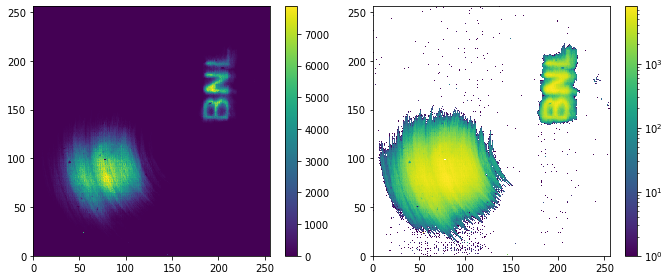

In [6]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(9.5, 4))

h = ax0.hist2d(x, y, bins = 256, range = [(0, 256), (0, 256)])
fig.colorbar(h[3], ax = ax0)

h = ax1.hist2d(x, y, bins = 256, range = [(0, 256), (0, 256)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax1)
fig.tight_layout()
plt.show()


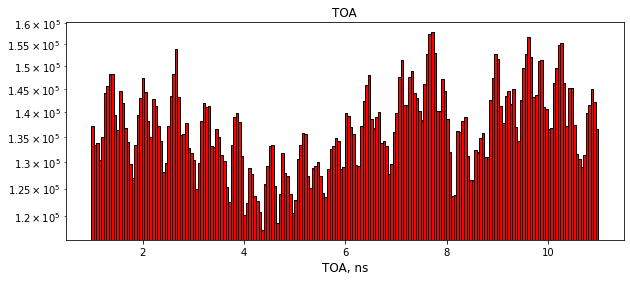

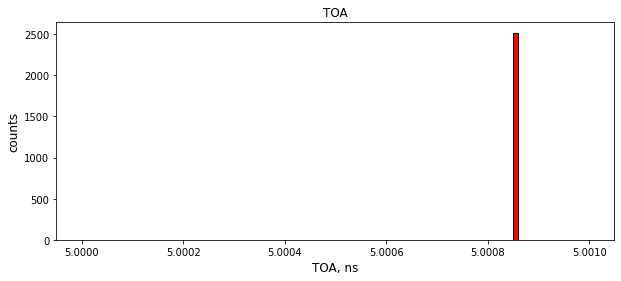

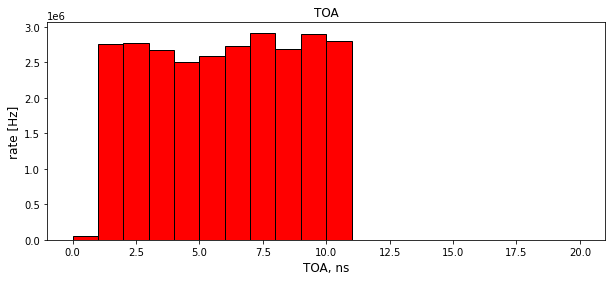

In [7]:
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(toa, bins = 200, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.yscale('log')
plt.show()

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(toa, bins = 100, range = (5.0, 5.001), color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(toa, bins = 20, range = (0., 20.0), color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('rate [Hz]',fontsize = 12)
plt.show()


In [8]:
xon =[]; yon = []; xoff = []; yoff = []


tminon = 0.9; tmaxon = 10.9; tminoff = 3.5; tmaxoff = 13.5

for i in range(len(toa)):
    if (tminon < toa[i] < tmaxon): 
        xon.append(x[i])
        yon.append(y[i])
    if (tminoff < toa[i] < tmaxoff): 
        xoff.append(x[i])
        yoff.append(y[i])
        
print(len(xon), len(xoff))

27118826 20450019


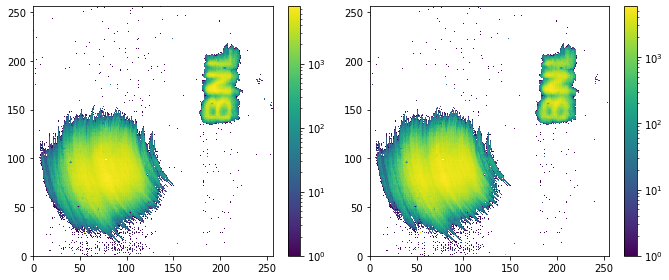

In [9]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(9.5, 4))

h = ax0.hist2d(xon, yon, bins = 256, range = [(0, 256), (0, 256)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax0)

h = ax1.hist2d(xoff, yoff, bins = 256, range = [(0, 256), (0, 256)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax1)

fig.tight_layout()
plt.show()

In [38]:
# Splitting bursts


tmin=1.0
tmax=10.9

bin_size = math.floor((tmax-tmin)/1e-3)

print('bin_size: ', bin_size)

x_burst=np.ndarray([bin_size], dtype=list)
y_burst=np.ndarray([bin_size], dtype=list)
toa_burst=np.ndarray([bin_size], dtype=list)
tot_burst=np.ndarray([bin_size], dtype=list)




for i in range(bin_size):
    x_burst[i] = []
    y_burst[i] = []
    toa_burst[i] = []
    tot_burst[i] = []


    
    
for i in range(len(toa)):
    if toa[i] > tmin and toa[i] < tmax:
        bin = math.floor((toa[i] - tmin)/1e-3)

        x_burst[bin].append(x[i])
        y_burst[bin].append(y[i])
        toa_burst[bin].append(toa[i])
        tot_burst[bin].append(tot[i])

img_data=np.ndarray([bin_size], dtype=np.ndarray)

    
for bin in range(bin_size):
    img_data[bin] = np.zeros([256,256])
    for k in range(len(y_burst[bin])):
        #j = x_burst[k]
        #i = 255 - y_burst[k]
        i = x_burst[bin][k]
        j = y_burst[bin][k]
        img_data[bin][i][j] = img_data[bin][i][j] + tot_burst[bin][k]    
    
    
        

bin_size:  9900


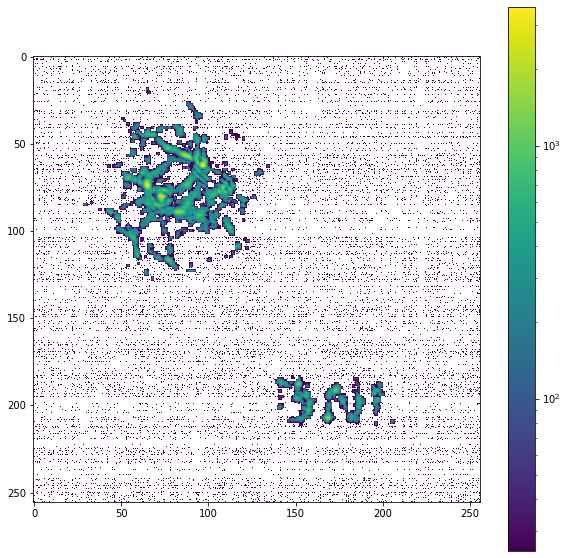

In [39]:
bin = 0


fig, ax = plt.subplots(ncols=1,nrows=1, figsize=(10, 10))
_=ax.imshow(img_data[bin], norm=mpl.colors.LogNorm())
fig.colorbar(_)


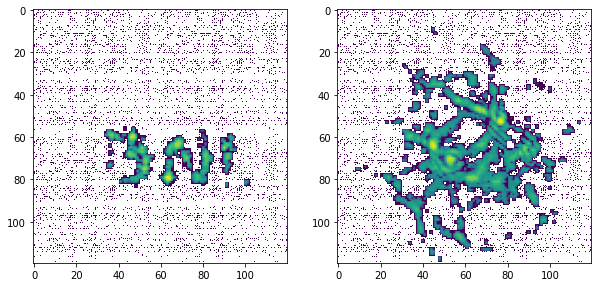

In [40]:


s1x1=128
s1x2=248

s1y1=105
s1y2=225

s2x1=10
s2x2=130

s2y1=20
s2y2=140




beam1=img_data[bin][s1x1:s1x2,s1y1:s1y2]
beam2=img_data[bin][s2x1:s2x2,s2y1:s2y2]


fig, ax = plt.subplots(ncols=2,nrows=1, figsize=(10, 10))
_=ax[0].imshow(beam1, norm=mpl.colors.LogNorm())
_=ax[1].imshow(beam2, norm=mpl.colors.LogNorm())


#fig.savefig('bnl.png')


In [41]:
#This cell evaluates how shifting one image against the other affects correlations


correlations=np.ndarray(shape=(11,11))


ct=0
for i in range(-5,6):
    for j in range(-5,6):


        lx = s1x1+i
        ux = s1x2+i

        ly = s1y1+j
        uy = s1y2+j

        corr_coefficients=[]
        
        for bin in range(bin_size):
            corr_coefficients.append(corr2(img_data[bin][lx:ux, ly:uy], img_data[bin][s2x1:s2x2,s2y1:s2y2]))
        
        correlations[i+5][j+5] = np.mean(corr_coefficients)
        print("i=",i,"j=",j,"corr=", correlations[i+5][j+5])
        #ct+=1
        

        
print('max index: ', np.argmax(correlations), ', max: ', np.amax(correlations))


i= -5 j= -5 corr= 0.19477278244702337
i= -5 j= -4 corr= 0.20266753080907315
i= -5 j= -3 corr= 0.2094507866566639
i= -5 j= -2 corr= 0.21472862208778715
i= -5 j= -1 corr= 0.21896699548546905
i= -5 j= 0 corr= 0.21897755108769243
i= -5 j= 1 corr= 0.21269200199392996
i= -5 j= 2 corr= 0.20292479380837045
i= -5 j= 3 corr= 0.19219544253434304
i= -5 j= 4 corr= 0.1810558621266007
i= -5 j= 5 corr= 0.1713858060129233
i= -4 j= -5 corr= 0.20487404515100327
i= -4 j= -4 corr= 0.21480722798010865
i= -4 j= -3 corr= 0.22566626373911722
i= -4 j= -2 corr= 0.23531747253659055
i= -4 j= -1 corr= 0.24412732971710974
i= -4 j= 0 corr= 0.24641527580866227
i= -4 j= 1 corr= 0.2374375401040612
i= -4 j= 2 corr= 0.22245390272389076
i= -4 j= 3 corr= 0.20859654821320653
i= -4 j= 4 corr= 0.1947080658415766
i= -4 j= 5 corr= 0.18247622773134486
i= -3 j= -5 corr= 0.20759000562002303
i= -3 j= -4 corr= 0.22081274530460646
i= -3 j= -3 corr= 0.23645798205127255
i= -3 j= -2 corr= 0.254130828128902
i= -3 j= -1 corr= 0.27356515053

In [42]:
img_size_x = 120
img_size_y = 120

shift_x = 0
shift_y = 0

lx = s1x1 - shift_x
ux = s1x2 - shift_x 

ly = s1y1 - shift_y
uy = s1y2 - shift_y

img_obj = np.ndarray([bin_size], dtype=np.ndarray)
img_back = np.ndarray([bin_size], dtype=np.ndarray)
img_sum = np.zeros([bin_size])
img_int = np.zeros([bin_size])

for bin in range(bin_size):
    img_obj[bin] = img_data[bin][lx:ux, ly:uy] 
    img_back[bin] = img_data[bin][s2x1:s2x2,s2y1:s2y2]
    #img_back[bin] = img_data[bin][lx:ux, ly:uy] 
    #img_obj[bin] = img_data[bin][s2x1:s2x2,s2y1:s2y2]
    #img_sum[bin] = np.sum(img_back[bin])
    img_sum[bin] = np.sum(img_obj[bin])
    #img_int[bin] = np.sum(img_obj[bin]) / img_size_x / img_size_y
    img_int[bin] = np.sum(img_back[bin])

img_mean = np.mean(img_sum)
int_mean = np.mean(img_int) # <X>


print(img_mean)


130243.54797979798


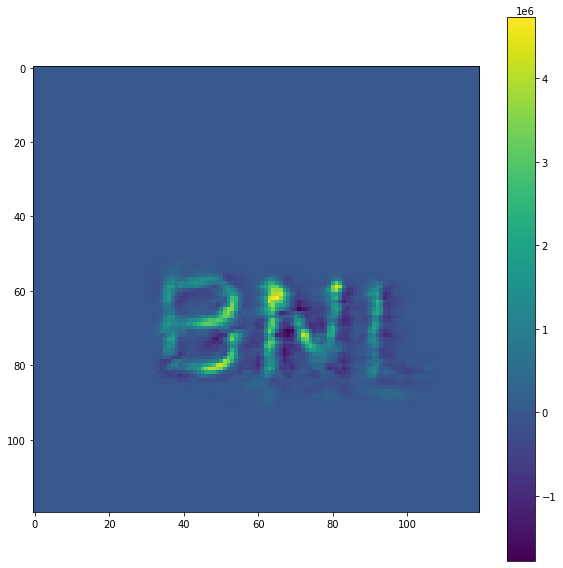

In [15]:


ghost = np.zeros([img_size_x,img_size_y])


for i in range(ghost.shape[0]):
    for j in range(ghost.shape[1]):
        term1=0
        term2=0
        term3=0
        for bin in range(bin_size):
            beam1 = img_obj[bin]
            beam2 = img_sum[bin]
            
            term1+=beam2*beam1[i,j]
            term2+=beam2
            term3+=beam1[i,j]
            
        ghost[i,j]=term1/bin_size - (term2*term3)/(bin_size ** 2)
        #print("i=",i," j=",j)

fig, ax = plt.subplots(ncols=1,nrows=1, figsize=(10, 10))
_=ax.imshow(ghost)
fig.colorbar(_)

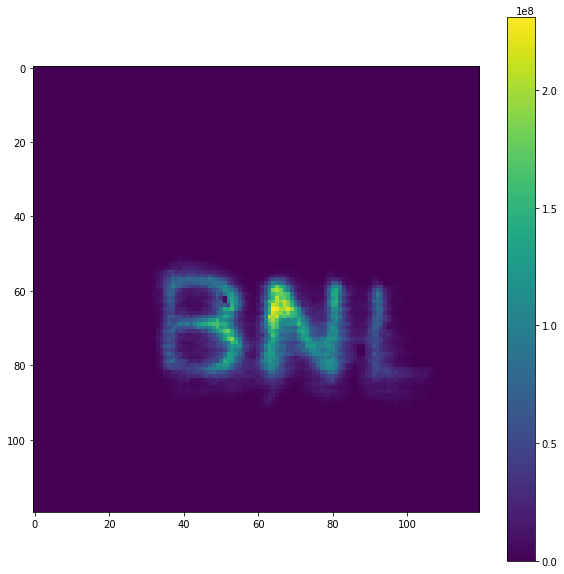

In [11]:
ghost = np.zeros([img_size_x,img_size_y])


for i in range(ghost.shape[0]):
    for j in range(ghost.shape[1]):
        sum = 0

        for bin in range(bin_size):
            sum += img_sum*img_obj[bin][i,j]

            
        ghost[i,j]=term1/bin_size

fig, ax = plt.subplots(ncols=1,nrows=1, figsize=(10, 10))
_=ax.imshow(ghost)
fig.colorbar(_)

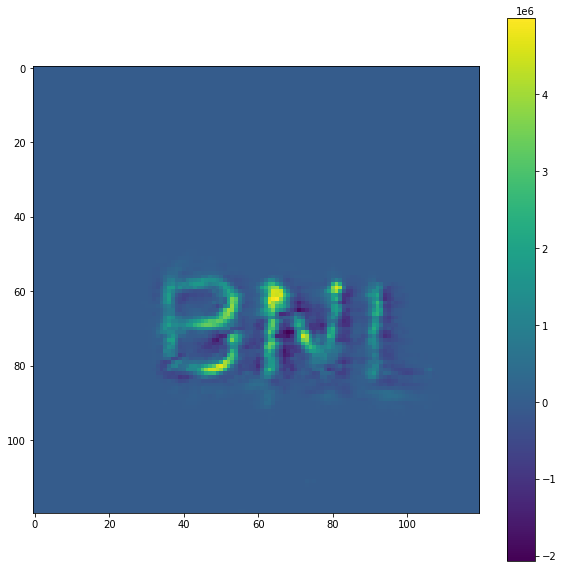

In [11]:
ghost = np.zeros([img_size_x,img_size_y])


for i in range(ghost.shape[0]):
    for j in range(ghost.shape[1]):
        term1=0
        term2=0
        term3=0
        for bin in range(bin_size):
            term1+=(img_sum[bin] - img_mean)*img_obj[bin][i,j]
            
        ghost[i,j]=term1/bin_size
        #print("i=",i," j=",j)

fig, ax = plt.subplots(ncols=1,nrows=1, figsize=(10, 10))
_=ax.imshow(ghost)
fig.colorbar(_)

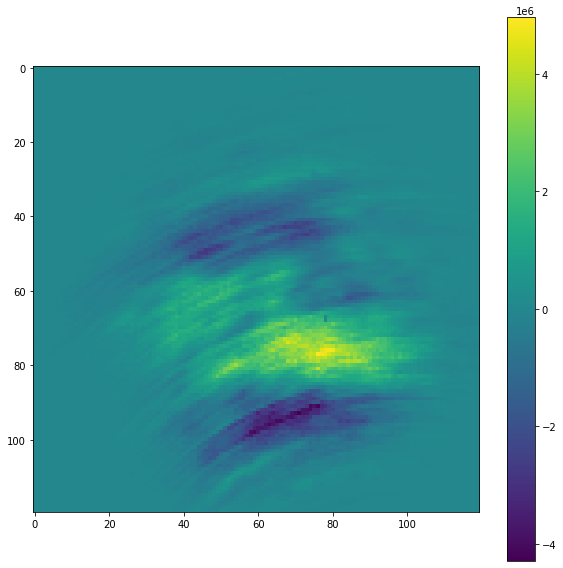

In [43]:
#DGI

ghost = np.zeros([img_size_x,img_size_y])


for i in range(ghost.shape[0]):
    for j in range(ghost.shape[1]):
        sum=0

        for bin in range(bin_size):
            sum += (img_sum[bin] - img_mean*img_int[bin]/int_mean) * img_back[bin][i,j]
            
        ghost[i,j] = sum / bin_size

fig, ax = plt.subplots(ncols=1,nrows=1, figsize=(10, 10))
_=ax.imshow(ghost)
fig.colorbar(_)

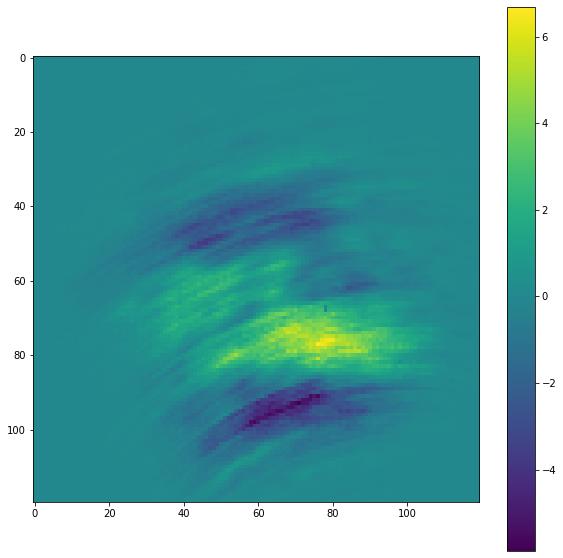

In [44]:
#NGI

ghost = np.zeros([img_size_x,img_size_y])


for i in range(ghost.shape[0]):
    for j in range(ghost.shape[1]):
        sum=0

        for bin in range(bin_size):
            sum += (img_sum[bin]/img_int[bin] - img_mean/int_mean) * img_back[bin][i,j]
            
        ghost[i,j] = sum / bin_size

fig, ax = plt.subplots(ncols=1,nrows=1, figsize=(10, 10))
_=ax.imshow(ghost)
fig.colorbar(_)

In [37]:
img_int[9996:10000]

array([731825.,      0.,      0.,      0.])

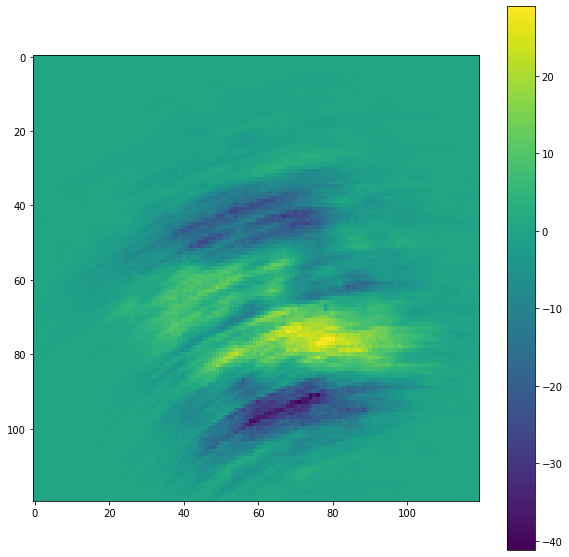

In [45]:
#LGI

ghost = np.zeros([img_size_x,img_size_y])


for i in range(ghost.shape[0]):
    for j in range(ghost.shape[1]):
        sum=0

        for bin in range(bin_size):
            sum += np.log(img_sum[bin]/img_mean) * img_back[bin][i,j]
            
        ghost[i,j] = sum / bin_size

fig, ax = plt.subplots(ncols=1,nrows=1, figsize=(10, 10))
_=ax.imshow(ghost)
fig.colorbar(_)

In [ ]:
#EGI

ghost = np.zeros([img_size_x,img_size_y])
C = 1.0

for i in range(ghost.shape[0]):
    for j in range(ghost.shape[1]):
        sum = 0.0

        for bin in range(bin_size):
            sum += (2 ** (img_sum[bin]/img_int[bin])) * img_obj[bin][i,j]
            
            
        ghost[i,j] = sum / bin_size

fig, ax = plt.subplots(ncols=1,nrows=1, figsize=(10, 10))
_=ax.imshow(ghost)
fig.colorbar(_)

/home/kyu/anaconda3/envs/qiskit/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()
/home/kyu/anaconda3/envs/qiskit/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()
